<a href="https://colab.research.google.com/github/Komal123-cloud-cmyk/openai-whisper-speech-transcription/blob/main/Task1_WebScraoing_Komal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install requests beautifulsoup4 pandas



In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Target website
url = "https://quotes.toscrape.com/page/1/"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

# Extract data
quotes = soup.find_all("span", class_="text")
authors = soup.find_all("small", class_="author")

data = []
for q, a in zip(quotes, authors):
    data.append({"Quote": q.text, "Author": a.text})

# Convert to DataFrame
df = pd.DataFrame(data)
print(df.head())



                                               Quote           Author
0  “The world as we have created it is a process ...  Albert Einstein
1  “It is our choices, Harry, that show what we t...     J.K. Rowling
2  “There are only two ways to live your life. On...  Albert Einstein
3  “The person, be it gentleman or lady, who has ...      Jane Austen
4  “Imperfection is beauty, madness is genius and...   Marilyn Monroe


In [3]:
df.to_csv("quotes.csv", index=False)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

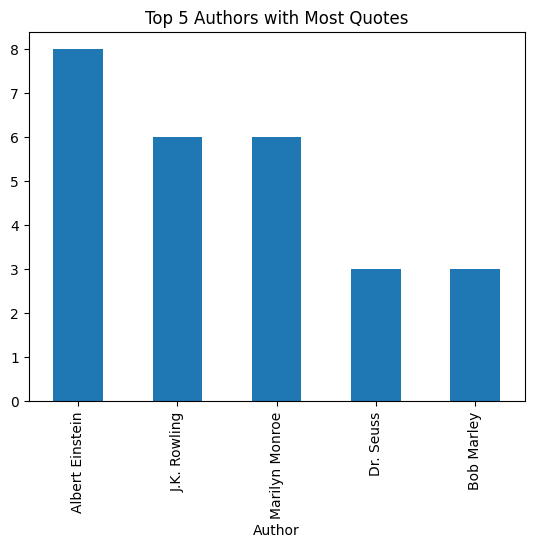

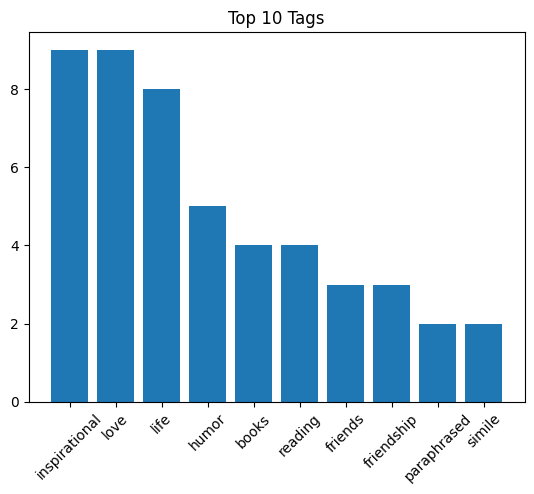

In [8]:
from google.colab import files
files.download("quotes.csv")

all_data = []

for page in range(1, 6):  # scrape first 5 pages
    url = f"https://quotes.toscrape.com/page/{page}/"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

    quotes = soup.find_all("span", class_="text")
    authors = soup.find_all("small", class_="author")

    for q, a in zip(quotes, authors):
        all_data.append({"Quote": q.text, "Author": a.text})

df = pd.DataFrame(all_data)
df.to_csv("all_quotes.csv", index=False)


all_data = []

for page in range(1, 6):
    url = f"https://quotes.toscrape.com/page/{page}/"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

    quotes = soup.find_all("div", class_="quote")

    for q in quotes:
        text = q.find("span", class_="text").text
        author = q.find("small", class_="author").text
        tags = [tag.text for tag in q.find_all("a", class_="tag")]

        all_data.append({"Quote": text, "Author": author, "Tags": ", ".join(tags)})

df = pd.DataFrame(all_data)
df.to_csv("quotes_with_tags.csv", index=False)
df.head()

import matplotlib.pyplot as plt

# Top 5 authors with most quotes
top_authors = df['Author'].value_counts().head(5)
top_authors.plot(kind='bar')
plt.title("Top 5 Authors with Most Quotes")
plt.show()

# Most common tags
from collections import Counter

all_tags = []
for t in df['Tags'].dropna():
    all_tags.extend(t.split(", "))

tag_counts = Counter(all_tags).most_common(10)
tags, counts = zip(*tag_counts)

plt.bar(tags, counts)
plt.xticks(rotation=45)
plt.title("Top 10 Tags")
plt.show()

